In [ ]:

import numpy as np
import pandas as pd

df = pd.read_csv('/content/Concrete_Data_Yeh.csv')
df.sample(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
591,252.5,0.0,0.0,185.7,0.0,1111.6,784.3,28,19.77
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28,68.30
613,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
922,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80


In [ ]:
df.shape

(1030, 9)

Source https://www.kaggle.com/code/nasruddinaz/strengthscan-concrete-strength-prediction/input

In [ ]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

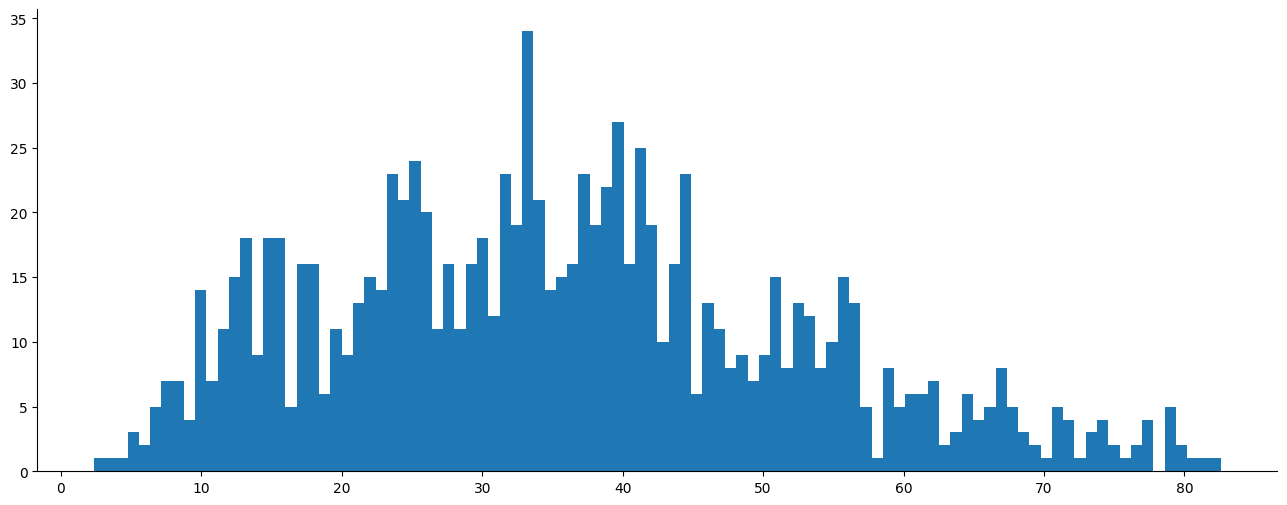

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['csMPa'], bins=100);

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('csMPa', axis=1)
y = df['csMPa']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
26/26 [==============================] - 1s 5ms/step - loss: 33.5064 - rmse: 33.3144
Epoch 2/150
26/26 [==============================] - 0s 6ms/step - loss: 12.1862 - rmse: 12.1578
Epoch 3/150
26/26 [==============================] - 0s 6ms/step - loss: 10.5697 - rmse: 10.5763
Epoch 4/150
26/26 [==============================] - 0s 7ms/step - loss: 10.8446 - rmse: 10.8410
Epoch 5/150
26/26 [==============================] - 0s 6ms/step - loss: 9.6821 - rmse: 9.6872
Epoch 6/150
26/26 [==============================] - 0s 7ms/step - loss: 8.8887 - rmse: 8.8883
Epoch 7/150
26/26 [==============================] - 0s 7ms/step - loss: 8.7170 - rmse: 8.7017
Epoch 8/150
26/26 [==============================] - 0s 6ms/step - loss: 8.1281 - rmse: 8.1454
Epoch 9/150
26/26 [==============================] - 0s 6ms/step - loss: 8.4758 - rmse: 8.4705
Epoch 10/150
26/26 [==============================] - 0s 6ms/step - loss: 7.6254 - rmse: 7.6128
Epoch 11/150
26/26 [=====================

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

7/7 [==============================] - 0s 2ms/step


array([[50.740536],
       [39.72812 ],
       [73.216   ],
       [32.637077],
       [ 9.611396]], dtype=float32)

In [ ]:
predictions = np.ravel(predictions)
predictions[:5]

array([50.740536, 39.72812 , 73.216   , 32.637077,  9.611396],
      dtype=float32)

In [ ]:
rmse(y_test, predictions).numpy()

5.936588208054463

In [ ]:
df['csMPa'].value_counts()

33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: csMPa, Length: 845, dtype: int64

In [ ]:
df['csMPa'].sort_values().value_counts()

33.40    6
71.30    4
23.52    4
79.30    4
77.30    4
        ..
28.02    1
28.10    1
28.24    1
28.30    1
82.60    1
Name: csMPa, Length: 845, dtype: int64

In [ ]:
df[df['csMPa']>50].value_counts()

cement  slag   flyash  water  superplasticizer  coarseaggregate  fineaggregate  age  csMPa
362.6   189.0  0.0     164.9  11.6              944.7            755.8          91   79.30    4
                                                                                56   77.30    4
                                                                                28   71.30    4
425.0   106.3  0.0     153.5  16.5              852.1            887.1          28   60.29    3
362.6   189.0  0.0     164.9  11.6              944.7            755.8          7    55.90    3
                                                                                             ..
313.3   262.2  0.0     175.5  8.6               1046.9           611.8          91   66.60    1
315.0   137.0  0.0     145.0  5.9               1130.0           745.0          28   81.75    1
318.8   212.5  0.0     155.7  14.3              852.1            880.4          28   55.50    1
                                             

In [ ]:
df['super_strong'] = [
    1 if csMPa >= 50 else 0 for csMPa in df['csMPa']
]

In [ ]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,super_strong
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0


In [ ]:
df.drop(['csMPa'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('super_strong', axis=1)
y = df['super_strong']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
26/26 [==============================] - 1s 4ms/step - loss: 0.4002 - accuracy: 0.8180 - precision: 0.5952 - recall: 0.3012
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.8823 - precision: 0.7379 - recall: 0.6446
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2163 - accuracy: 0.8944 - precision: 0.7453 - recall: 0.7229
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9296 - precision: 0.8699 - recall: 0.7651
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9284 - precision: 0.8452 - recall: 0.7892
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1404 - accuracy: 0.9430 - precision: 0.8563 - recall: 0.8614
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9417 - precision: 0.8882 - recall: 0.8133
Epoch 8/150
26/26 [=============================

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

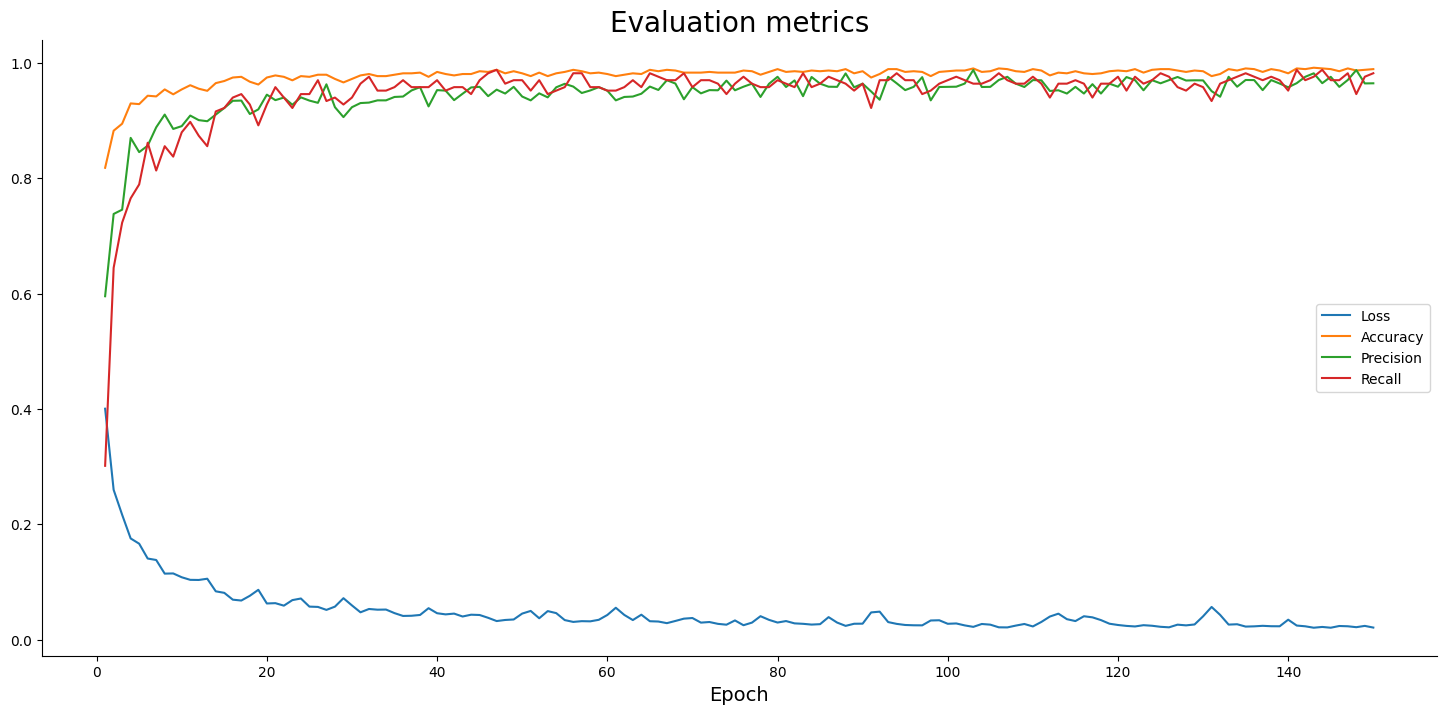

In [ ]:
plt.plot(
    np.arange(1, 151),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 151),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 151),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 151),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

7/7 [==============================] - 0s 3ms/step


array([[9.99614418e-01],
       [2.95396268e-01],
       [9.99825239e-01],
       [1.15822181e-01],
       [2.63191681e-30],
       [1.59961332e-04],
       [2.13236055e-21],
       [1.06492683e-01],
       [1.07479954e-11],
       [2.40044142e-06],
       [1.70778222e-07],
       [1.35770809e-29],
       [9.97187674e-01],
       [5.18844863e-05],
       [1.20864436e-14],
       [4.90220351e-20],
       [1.36307718e-17],
       [1.33680369e-26],
       [5.02738994e-18],
       [1.26679759e-15],
       [1.29240663e-11],
       [4.13123481e-28],
       [8.61142296e-04],
       [2.68013814e-34],
       [3.04521859e-06],
       [7.95941887e-05],
       [2.28744464e-36],
       [2.20401282e-03],
       [9.99812841e-01],
       [5.26224487e-28],
       [1.67824663e-02],
       [6.54204468e-12],
       [9.98784781e-01],
       [9.99507368e-01],
       [5.39016187e-20],
       [1.02824832e-19],
       [2.84923621e-14],
       [3.09546181e-07],
       [0.00000000e+00],
       [9.00538564e-01],


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[159   3]
 [ 13  31]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.92
Precision: 0.91
Recall: 0.70


#Optimize learning rate


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=150,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/150
26/26 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.7937 - lr: 0.0010
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.8799 - lr: 0.0011
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9029 - lr: 0.0012
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1834 - accuracy: 0.9248 - lr: 0.0013
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9248 - lr: 0.0014
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1533 - accuracy: 0.9296 - lr: 0.0015
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9320 - lr: 0.0016
Epoch 8/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9466 - lr: 0.0017
Epoch 9/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9320 - lr:

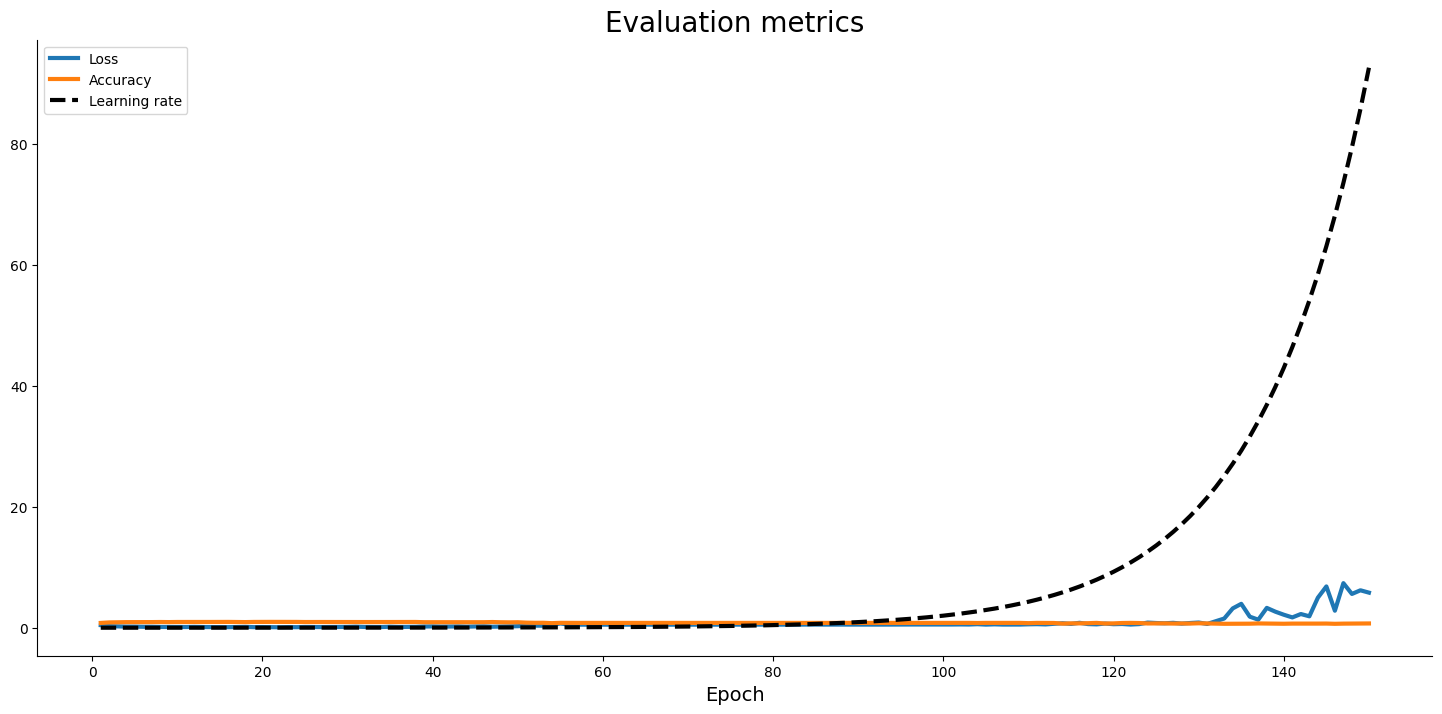

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 151),
    initial_history.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 151),
    initial_history.history['accuracy'],
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 151),
    initial_history.history['lr'],
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

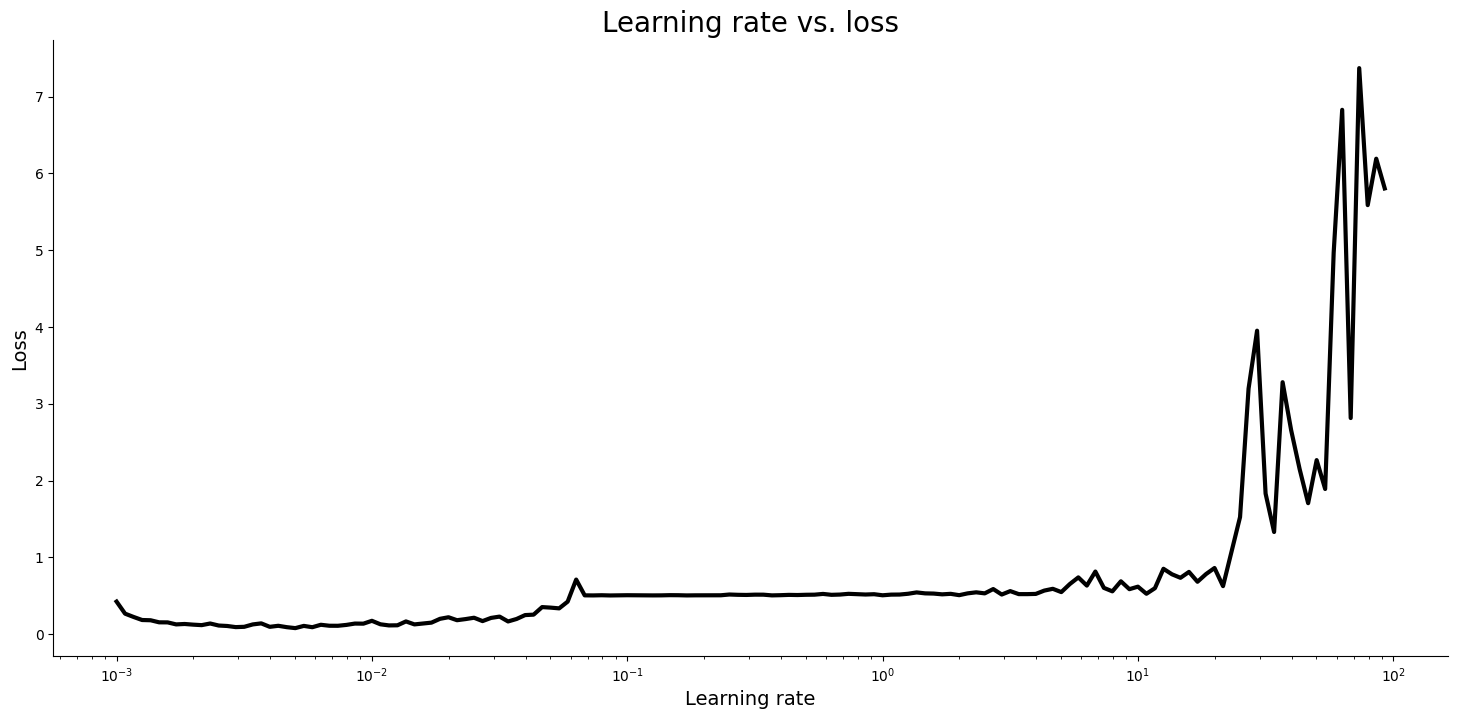

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(150) / 30))
plt.semilogx(
    learning_rates,
    initial_history.history['loss'],
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [ ]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=150
)

Epoch 1/150
26/26 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.8519
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2037 - accuracy: 0.9078
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9126
Epoch 4/150
26/26 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.9223
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1613 - accuracy: 0.9357
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1580 - accuracy: 0.9284
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9357
Epoch 8/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9417
Epoch 9/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9442
Epoch 10/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9430
Epoch 11/

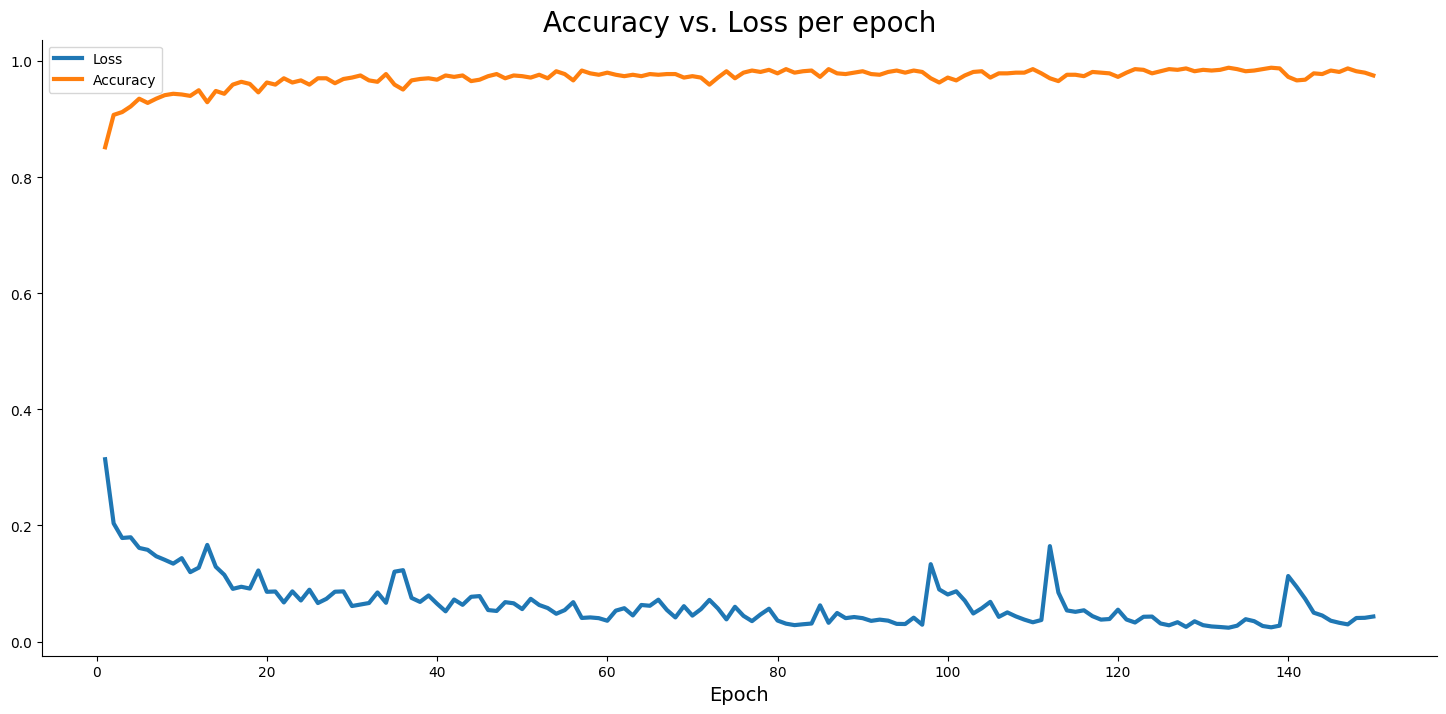

In [ ]:
plt.plot(
    np.arange(1, 151),
    history_optimized.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 151),
    history_optimized.history['accuracy'],
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

7/7 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.91

Confusion matrix:
[[158   4]
 [ 15  29]]


In [ ]:
#before opti
#[[159   3]
# [ 13  31]]

In [ ]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=150
)

Epoch 1/150
26/26 [==============================] - 1s 5ms/step - loss: 0.3972 - accuracy: 0.8216
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.8811
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 0.8981
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.9248
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9284
Epoch 6/150
26/26 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.9333
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1352 - accuracy: 0.9381
Epoch 8/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.9539
Epoch 9/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.9490
Epoch 10/150
26/26 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9587
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

7/7 [==============================] - 0s 4ms/step
Accuracy on the test set: 0.91

Confusion matrix:
[[159   3]
 [ 15  29]]
